Column names in the dataset: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00  

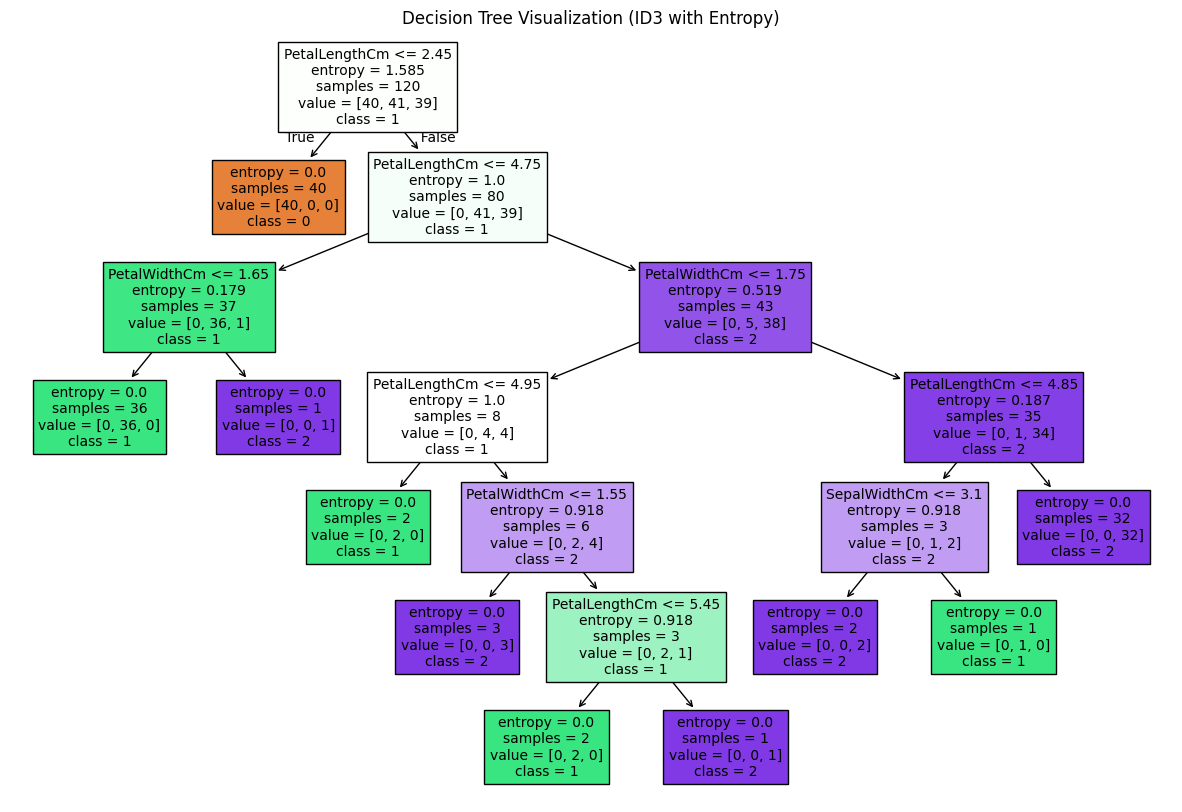

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load Iris dataset from CSV
iris_df = pd.read_csv('Iris.csv')

# Inspect the dataset
print("Column names in the dataset:", iris_df.columns)
print(iris_df.head())

# Update the target column name
target_column = 'Species'

# Encode the target labels if they are strings
iris_df[target_column] = iris_df[target_column].astype('category').cat.codes

# Separate features and target variable
X = iris_df.drop(columns=['Id', target_column])  # Drop 'Id' as it's not a feature
y = iris_df[target_column]

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier using entropy (ID3)
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(15, 10))
class_names = [str(cls) for cls in iris_df[target_column].astype('category').cat.categories]
plot_tree(dt_model, feature_names=X.columns, class_names=class_names, filled=True)
plt.title("Decision Tree Visualization (ID3 with Entropy)")
plt.show()